# Clustering Songs from a Kaggle Dataset

## By Nils Jennissen and Ruben Tak

Github:
- https://github.com/nilsjenn
- https://github.com/rubentak

Medium:
- https://medium.com/@nijenn
- https://medium.com/@rubentak

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
from math import pi, ceil

https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

## Load Data

In [2]:
kaggle = pd.read_csv('kaggle_spotify.csv')

In [3]:
kaggle.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [5]:
# Creat genre_number column
kaggle['genre_num'] = kaggle['track_genre'].astype('category').cat.codes

## Look for high correlation between features

<Axes: >

<Figure size 640x480 with 0 Axes>

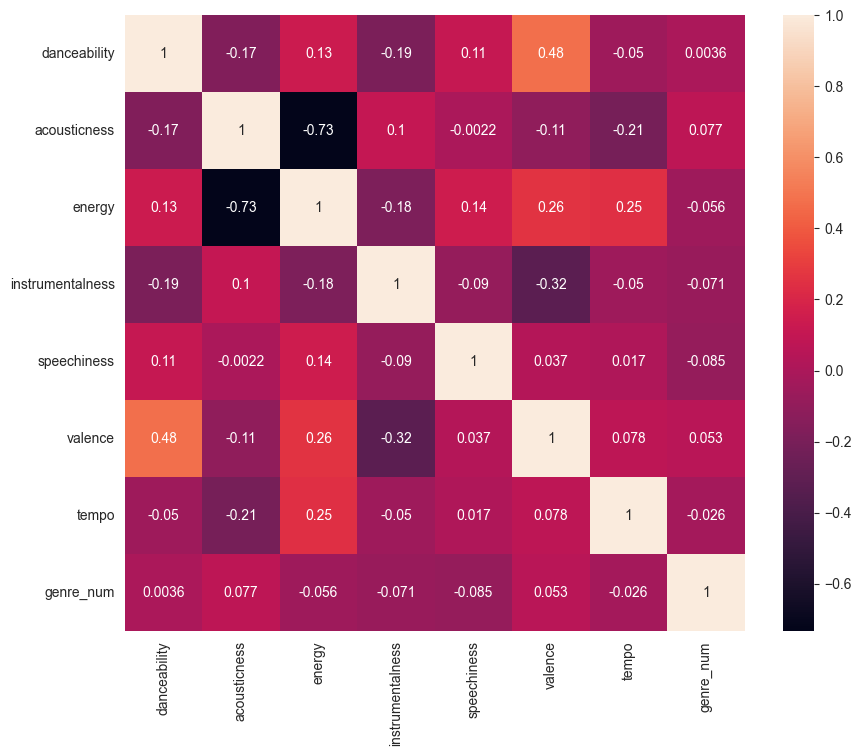

In [6]:
# Correlation Matrix
plt.tight_layout()
plt.figure(figsize=(10, 8))
corrMatrix = kaggle[['danceability', 'acousticness', 'energy', 'instrumentalness', 'speechiness', 'valence', 'tempo', 'genre_num']].corr()
sns.heatmap(corrMatrix, annot=True)

#### It appears that there is a high correlation between danceability and valence and a high negative correlation  accousticness and energy.

In [8]:
#list collums
kaggle.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'genre_num'],
      dtype='object')

## Feature selection`

#### We will select the following features for my model: danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, genre_num. We will not use duration_ms, explicit, track_id, track_name, track_artist, track_genre, track_popularity, track_album_id, track_album_name, track_album_release_date.

In [25]:
# Select features and track names
df_log = kaggle[
    ['danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre_num']]

## Standardize the data

In [10]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)

## Elbow Method

#### The elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variance as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

In [26]:
errors = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    errors.append(model.inertia_)

/Users/erictak/PycharmProjects/Spotify_1/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/erictak/PycharmProjects/Spotify_1/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/erictak/PycharmProjects/Spotify_1/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/erictak/PycharmProjects/Spotify_1/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

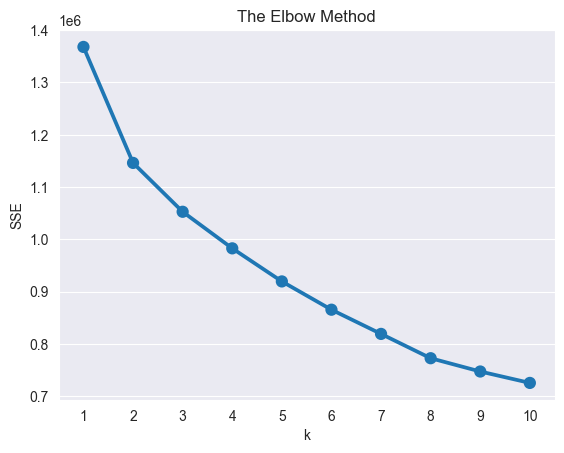

In [27]:
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(range(1,11)), y=errors)
plt.savefig("Elbow.png")

In [28]:
kl = KneeLocator(x = range(1, 11),
                 y = errors,
                 curve="convex",
                 direction="decreasing")
print('The optimum number of clusters is: ' + str(kl.elbow))

The optimum number of clusters is: 3


#### The optimum number of clusters is 3 according to the elbow method. This however is not a good number of clusters for clustering songs as the clusters will be too lagre. We will use 10 clusters to get more specific clusters and create 10 playlists.

## K-Means Clustering

In [29]:
model = KMeans(n_clusters=10, random_state=42)
model.fit(df_scaled)

/Users/erictak/PycharmProjects/Spotify_1/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=10, random_state=42)

In [31]:
df = kaggle.assign(ClusterLabel= model.labels_)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,genre_num,ClusterLabel
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,0,7
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,0,2
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,0,2
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,0,2
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,0,2


In [33]:
# create csv file from the df called kaggle_spotify_clustered.csv
df.to_csv('kaggle_spotify_cluster.csv', index=False)

#### Using 10 clusters we can now create 10 playlists.

## Visualize clusters

#### We will now visualize the clusters in a radar chart. The radar chart will show the mean value for each feature for each cluster. This will give us an idea of the characteristics of each cluster.

In [44]:
# Create a data frame with the mean value for each feature for each cluster
cluster_values = df.groupby("ClusterLabel")[['danceability', 'energy','key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','genre_num']].mean()
cluster_values

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre_num
ClusterLabel,,,,,,,,,,,,
0,0.665985,0.721626,0.733188,0.798634,1.000000,0.065758,0.220300,0.017917,0.168010,0.656330,0.491134,0.525693
1,0.651723,0.713770,0.122188,0.795857,1.000000,0.063748,0.212756,0.025705,0.174952,0.618250,0.490714,0.519403
2,0.512023,0.336420,0.455435,0.707407,0.770415,0.047996,0.735534,0.034402,0.159497,0.363493,0.465717,0.557153
3,0.522493,0.752945,0.486239,0.784017,0.679317,0.084459,0.295452,0.071477,0.767078,0.507041,0.506765,0.584101
4,0.350433,0.166374,0.439659,0.519967,0.653863,0.052348,0.869200,0.811913,0.160344,0.185949,0.424231,0.470666
5,0.604888,0.733497,0.505670,0.757511,0.521905,0.070159,0.117428,0.805195,0.166109,0.341008,0.515630,0.448154
6,0.409100,0.838493,0.490099,0.820411,0.691492,0.089941,0.061004,0.066925,0.207719,0.319377,0.617174,0.413588
7,0.669216,0.727442,0.554115,0.799604,0.000000,0.071554,0.183760,0.025975,0.171238,0.588869,0.487747,0.508197
8,0.569196,0.696911,0.461243,0.707264,0.694475,0.915597,0.783864,0.006438,0.721442,0.431383,0.410415,0.198871


#### Visualize cluster profiles in a radar chart


In [45]:
# Define columns
columns = ['danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre_num']

# Adjust values between 0 and 1 measured by the min and max value of each column
for column in columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Define cluster labels
cluster_labels = df['ClusterLabel'].unique()

# First create a list of all the traces
traces = []

# Loop through all clusters
for cluster in cluster_labels:
    # Create a trace for each cluster
    trace = go.Scatterpolar(
        r = df[df['ClusterLabel'] == cluster][columns].mean().values,
        theta = columns,
        fill = 'toself',
        name = 'Cluster ' + str(cluster)
    )
    # Append trace to traces list
    traces.append(trace)

# Create layout
layout = go.Layout(
    title = 'Cluster Profiles',
    polar = dict(
        radialaxis = dict(
            visible = True,
            range = [0, 1]
        )
    ),
    showlegend = True
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Plot figure
fig.show()

In [36]:
# Put in a data frame the mean value for each value of each cluster
df_cluster = df.groupby('ClusterLabel')[columns].mean().reset_index()
df_cluster

,ClusterLabel,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre_num
0,0,0.665985,0.721626,0.733188,0.798634,1.000000,0.065758,0.220300,0.017917,0.168010,0.656330,0.491134,0.525693
1,1,0.651723,0.713770,0.122188,0.795857,1.000000,0.063748,0.212756,0.025705,0.174952,0.618250,0.490714,0.519403
2,2,0.512023,0.336420,0.455435,0.707407,0.770415,0.047996,0.735534,0.034402,0.159497,0.363493,0.465717,0.557153
3,3,0.522493,0.752945,0.486239,0.784017,0.679317,0.084459,0.295452,0.071477,0.767078,0.507041,0.506765,0.584101
4,4,0.350433,0.166374,0.439659,0.519967,0.653863,0.052348,0.869200,0.811913,0.160344,0.185949,0.424231,0.470666
5,5,0.604888,0.733497,0.505670,0.757511,0.521905,0.070159,0.117428,0.805195,0.166109,0.341008,0.515630,0.448154
6,6,0.409100,0.838493,0.490099,0.820411,0.691492,0.089941,0.061004,0.066925,0.207719,0.319377,0.617174,0.413588
7,7,0.669216,0.727442,0.554115,0.799604,0.000000,0.071554,0.183760,0.025975,0.171238,0.588869,0.487747,0.508197
8,8,0.569196,0.696911,0.461243,0.707264,0.694475,0.915597,0.783864,0.006438,0.721442,0.431383,0.410415,0.198871
9,9,0.709786,0.661452,0.509317,0.783185,0.523394,0.348349,0.279827,0.027609,0.186201,0.555579,0.512264,0.468632


In [43]:
# give the top genres per cluster label
df_cluster_genre = df.groupby('ClusterLabel')['track_genre'].value_counts().groupby(level=0).nlargest(3).reset_index(level=0, drop=True)
df_cluster_genre

ClusterLabel  track_genre   
0             party             361
              salsa             313
              rockabilly        292
1             children          298
              party             258
              synth-pop         258
2             romance           794
              tango             707
              honky-tonk        689
3             pagode            482
              sertanejo         413
              samba             404
4             new-age           773
              classical         740
              sleep             733
5             minimal-techno    840
              detroit-techno    757
              techno            587
6             death-metal       637
              metalcore         588
              black-metal       540
7             house             418
              latino            417
              dance             415
8             comedy            801
              kids               12
              show-tunes         12